## Module 5: Feature Engineering 
- Feature engineering is an important step in the process of preparing data for machine learning models. 
- It involves creating new features or attributes from the existing data that can help improve the performance of a model. 
- Effective feature engineering can lead to better model accuracy and generalization. 

Here are some key aspects of feature engineering:
- **Feature creation:**
    - Polynomial features: We can create polynomial features (*e.g.* square, cube, sqare root, reciprocal *etc.*) of existing attributes that can help in capturing non-linear relationships between variables.
    - Interaction features: Combine two or more features to create interaction terms. For example, if you have features for height and weight, you can create a new feature for body mass index (BMI).

- **Feature extraction:**
    - Use dimensionality reduction techniques like Principal Component Analysis (PCA) or Linear Discriminant Analysis (LDA) to reduce the number of features while retaining most of the variance in the data.

- **Domain-specific features:**
    - In some cases, domain knowledge can guide feature engineering. Experts in a specific field may know of important variables or transformations that are relevant to the problem.

- **Feature selection:**
    - We can choose the select the right set of features after machine learning model building. In regression, we can use L1 regularization (Lasso), and in tree-based algorithms, we can look at feature importance. Based on this analysis, we can drop less important features and rebuild the model. 

### Part 5.1.1: Reducing the dimensionality of data sets - I
- One of the techniques to reduce the number of dimensions in the data is to derive new features from existing features.
- This may also include removing unwanted features.
- For example, if we have two columns viz. date of birth and age of a person, we can retain date of birth and remove age, because, can be computed at any time, when date of birth is known.
- Similarly, if we have height and weight of a person, we can reduce them into one column called BMI.

**Let us try different techniques of dimensionality reduction in the upcoming lectures.**
- We will use the dataset *Obesity_data.csv* for this purpose.
- The features/attributes of this dataset are given below:
    - Gender, Age, Height and Weight : self explanatory fields
    - family_history_with_overweight : Whether a person has any family member with overweight (yes or no)
    - FAVC : Frequent consumption of high caloric food 
    - FCVC : Frequency of consumption of vegetables
    - NCP : Number of main meals
    - CAEC : Consumption of food between meals
    - SMOKE : Whether a person has smoking habit (Yes or no)
    - CH2O : Consumption of water daily
    - SCC : Calories consumption monitoring
    - FAF : Physical activity frequency
    - TUE : Time using technology devices
    - CALC : Consumption of alcohol
    - MTRANS : Transportation used
    - Obesity : Whether a person is obese or not (yes or no)

In [1]:
#import the required packages

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [2]:
#read the data 
obesity_data = pd.read_csv("Obesity_data.csv")
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Non_Obese
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Non_Obese
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Non_Obese
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Non_Obese
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Non_Obese


In [3]:
# shape of the data
obesity_data.shape

(2111, 17)

In [4]:
# are there any missing values?
obesity_data.isna().sum()   #there are no missing values as per the result

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity                           0
dtype: int64

### Part 5.1.2: Reducing the dimensionality of data sets - II
- As we can see from the obesity dataset, we have height and weight information in two different columns.
- This can be reduced to a single column - BMI.
- We can achieve this with the help of ***lambda*** functions. 
- Let us first understand lambda functions in Python.

#### Lambda functions
- A lambda function is a small anonymous function.
- It can take any number of arguments, but can only have one expression as a task.
- The syntax is:            

    ***lambda*** arguments : expression
 
- Here, *lambda* is a keyword.
- Let us look at some examples of lambda functions.


**Example 1:**

In [5]:
# simple example of a lambda function
x = lambda a : a + 10
print(x(13))

23


In [6]:
# equivalent user-defined function for the same task:
def AddTen(a):
    return a + 10

x = int(input('Enter a number:'))
result = AddTen(x)
print(result)

Enter a number:23
33


**Example 2:**

In [7]:
# a lambda function with two arguments
x = lambda a, b : a + b
print(x(10,20))
print(x(2,-4))
print(x('hi', 'hello'))  # also does concatenation of strings

30
-2
hihello


In [8]:
# equivalent user-defined function
def myfun(a,b):
    return a + b

x = 10
y = 20
z = myfun(x,y)
print(z)

30


**Example 3:**

In [9]:
# a lambda function with lists
ls = [[2, 5, 4],[1, 16, 4, 64],[12, 6, 9, 3]]
 
# sort each sublist
SortList = lambda x: [sorted(i) for i in x]
SortList(ls)

[[2, 4, 5], [1, 4, 16, 64], [3, 6, 9, 12]]

**NOTE:**
- Lambda functions play a key role in applying simple operations on a column of the dataset. 
- With a single line of code, we will be able to perform operation on all the rows. 
- Lambda functions are much more powerful and simple compared to doing the same tasks using a `for` loop

**Let us now use a lambda function on the obesity data to create a new BMI column using the existing Weight and Height columns**

In [10]:
# write the lambda function
obesity_data = obesity_data.assign(BMI = lambda x: x['Weight'] / (x['Height']**2))
obesity_data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Non_Obese,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Non_Obese,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Non_Obese,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Non_Obese,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Non_Obese,28.342381


**We can see that the new columns *BMI* has been created. Now we can drop Weight and Height columns from the data.**

In [11]:
# look at the data
obesity_data = obesity_data.drop(['Height','Weight'], axis = 1)
obesity_data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Non_Obese,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Non_Obese,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Non_Obese,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Non_Obese,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Non_Obese,28.342381


In [12]:
# dimension is reduced by 1
obesity_data.shape

(2111, 16)

In [13]:
#statistical features of the data
obesity_data.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


### Part 5.1.3: Feature engineering - I
- In the previous lecture, we have seen how to create derived features using existing features to reduce the dimensionality.
- We will now focus on feature engineering using PCA.
- In this lecture, we will understand how to extract principal components from the dataset.
- Principal Component Analysis (PCA) is a widely-used dimensionality reduction technique used in data analysis and machine learning. 
- It is primarily used for reducing the complexity of high-dimensional data while preserving the most important information. 
- PCA helps in reducing the number of features (dimensions) in the dataset while maintaining the essential patterns and relationships in the data. 
- This is useful when we have too many attributes in the data and we want to simplify our analysis.

**The logic of PCA flows as follows:** 

1. **Variance**: In PCA, we're interested in capturing the variance (spread or variability) in the data. The idea is to find the directions (principal components) along which the data varies the most. These directions represent the main patterns or trends in the data.

2. **Orthogonal transformation**: PCA does this by performing an orthogonal transformation on the data, which means it rotates the original coordinate system to align with the directions of maximum variance. These new coordinates (principal components) are uncorrelated with each other.

3. **Eigenvalues and eigenvectors**: PCA calculates the eigenvalues and eigenvectors of the data's covariance matrix. Eigenvalues tell us how much variance is explained by each principal component, while eigenvectors are the directions of those components.

4. **Ranking by variance**: PCA ranks the principal components in order of the amount of variance they explain. The first principal component explains the most variance, the second explains the second most, and so on.

6. **Reducing dimensions**: You can choose to keep only the top few principal components that capture most of the data's variance. This effectively reduces the dimensionality of our data. The retained components are a compact representation of the original data.

**Let us look at a simple example of PCA**

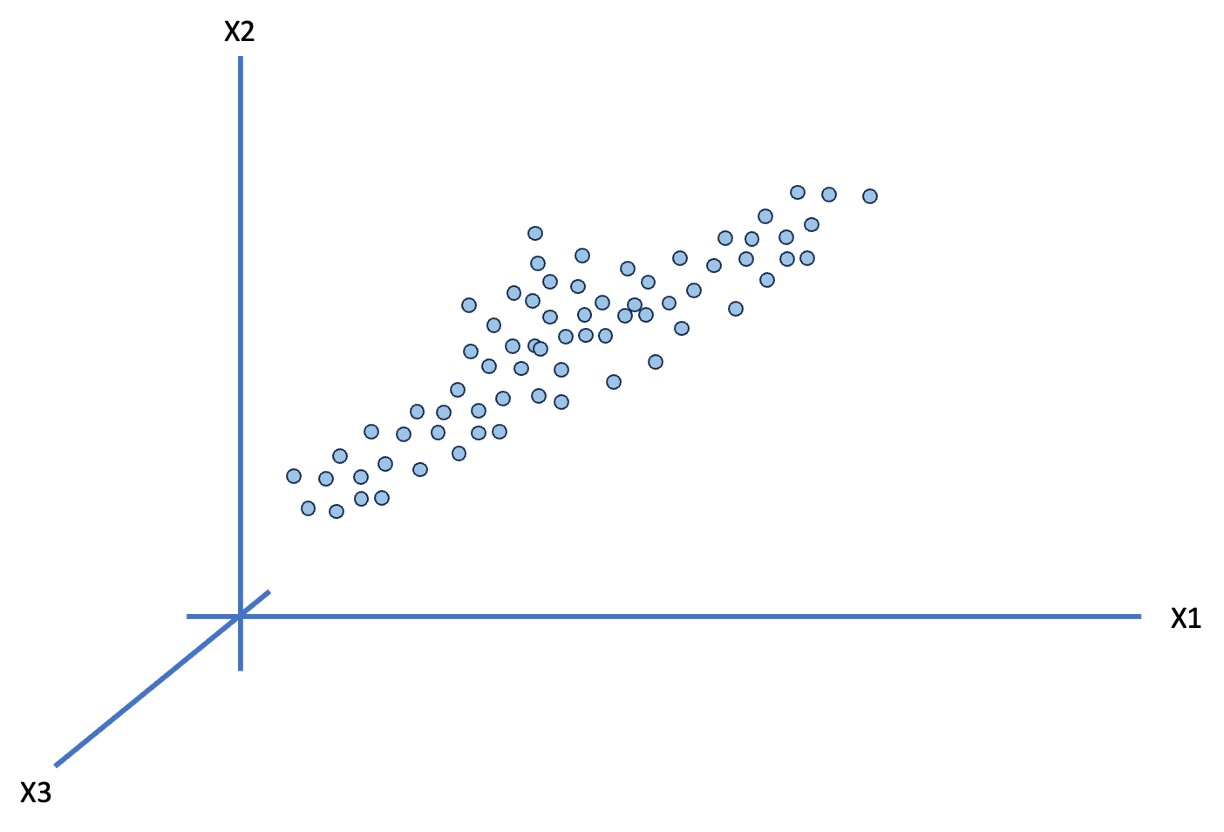

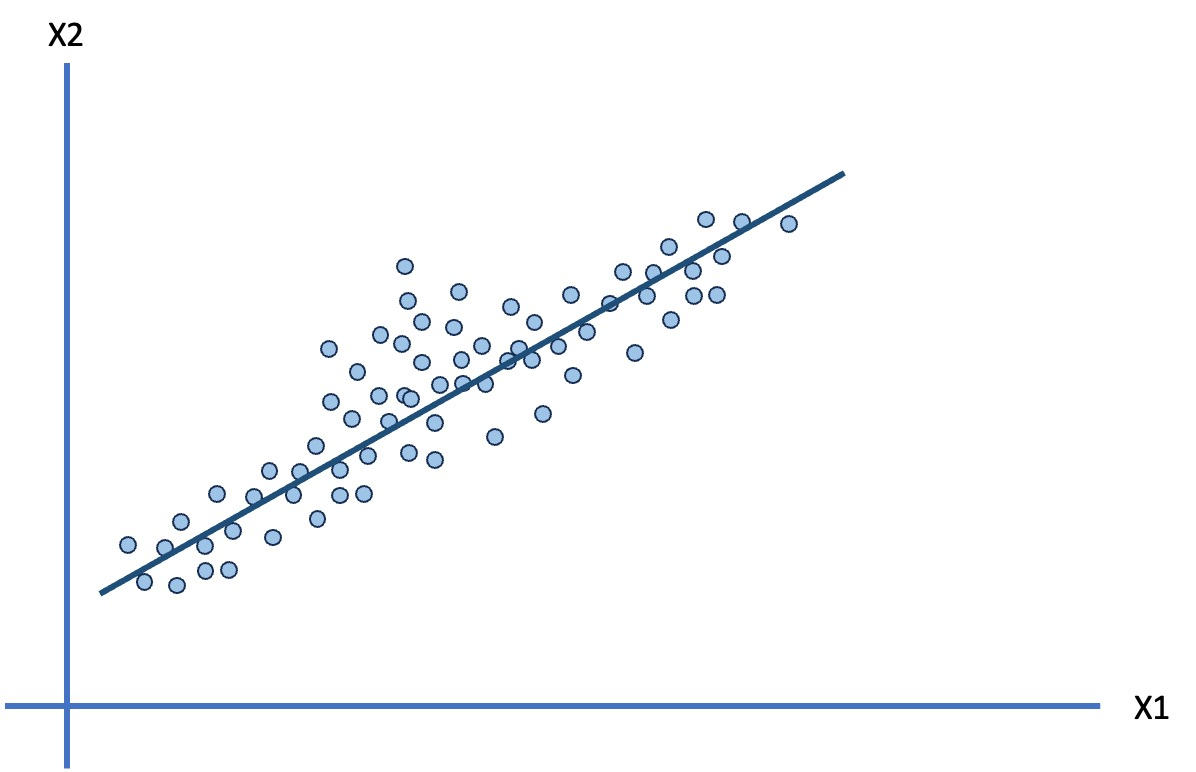

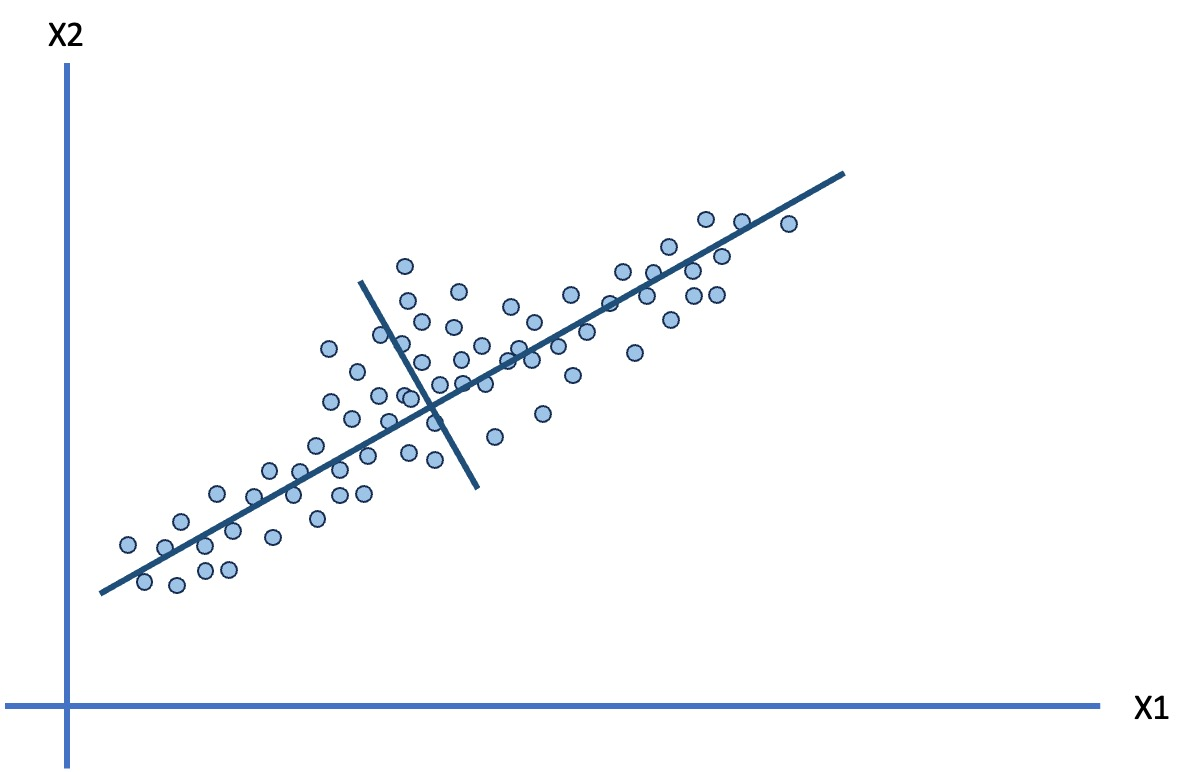

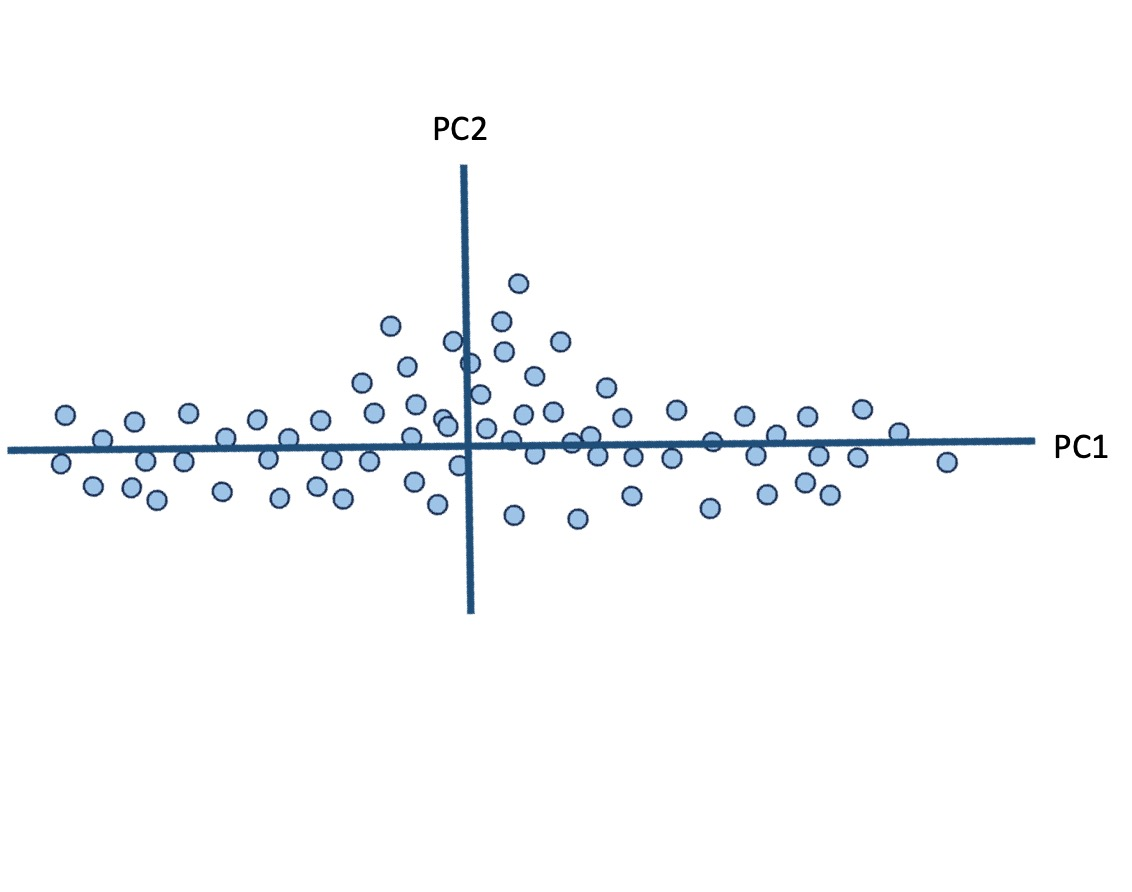

**Now, let us try to implement PCA on the obesity data**

In [14]:
# view the data again
obesity_data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Non_Obese,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Non_Obese,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Non_Obese,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Non_Obese,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Non_Obese,28.342381


**NOTE:**
- Observe that there is a column called *Obesity* indicating whether a person is obsese or non-obese. This is a target variable for machine learning model building. That is, all other attributes are the independent variables and *Obesity* is the dependent variable, whose value can be predicted based on the values of other indedpent variables. 
- For feature engineering, we will only consider the independent attributes, as they are the deciding factors in predicting the dependent or target variable.
- So, let us drop this column from our data.

In [15]:
# save the target variable and delete it for now
target = obesity_data['Obesity']
obesity_data = obesity_data.drop('Obesity',axis=1)

In [16]:
# check the unique values in the target
target.unique()

array(['Non_Obese', 'Obese'], dtype=object)

In [17]:
# let us recode the values as 0 and 1
target = target.replace({'Non_Obese':0, 'Obese':1})

#### Data transformation
- We have few columns in data which are categorical in nature.
- And, we can observe that these categorical features are nominal data.
- So, let us apply one-hot encoding on these columns.

In [18]:
# encode categoric features
obesity_data = pd.get_dummies(obesity_data,columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], drop_first=True)
obesity_data.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,family_history_with_overweight_yes,FAVC_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,24.386526,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,24.238227,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,2.0,3.0,2.0,2.0,1.0,23.765432,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,27.0,3.0,3.0,2.0,2.0,0.0,26.851852,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,2.0,1.0,2.0,0.0,0.0,28.342381,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
obesity_data.shape

(2111, 22)

**Observe that now there are 22 columns in the data, and earlier we had 17 columns.**

#### Data Normalization:
- As we have few continuous attributes with a different scales, it is better to normalize them.
- Let us use z-score normalization (or standard scalar)

In [20]:
# standardize the data
sc = StandardScaler()
cols = ['Age', 'BMI', 'FCVC','NCP','CH2O','FAF','TUE' ]
for col in cols:
    obesity_data[col] = sc.fit_transform(obesity_data[col].values.reshape(-1,1))

obesity_data.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,family_history_with_overweight_yes,FAVC_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.785019,0.404153,-0.013073,-1.188039,0.561997,-0.663421,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,-0.522124,1.088342,0.404153,1.618759,2.339750,-1.080625,-0.681937,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,-0.206889,-0.785019,0.404153,-0.013073,1.163820,0.561997,-0.740967,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.423582,1.088342,0.404153,-0.013073,1.163820,-1.080625,-0.355619,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.364507,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,-0.169522,1,0,0,...,0,0,0,0,1,0,0,0,1,0


#### Fitting PCA
- Creating principal components (important features) out of the existing features has two steps:
    - Create an object of the class *PCA* by providing the number of principal components (PCs) as a parameter
    - Use *fit_transform()* method to create PCs.
- Note that the number of PCs, denoted by the parameter *n_components* is value to be decided on some criteria. We will see that later.
- At this moment, let us create just two PCs, out of 22 attributes that we have. 

In [21]:
# perform PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(obesity_data)
pca_data

array([[ 0.86049914,  0.69130993],
       [ 0.51483735, -2.3182808 ],
       [ 1.45952494, -0.27046629],
       ...,
       [-1.11505473, -1.46991056],
       [-1.50565687, -2.01434136],
       [-1.41126411, -2.027575  ]])

***Explanation:***
- Principal components are nothing but a linear combination of all the input features with coefficients obtained in such a way that PC's will explain maximum variation in data in the decreasing order.
- That is, first principal component will explain the highest variation, the second PC will explain the next highest variation and so on. 
- So, the above scores are result of a linear combination of input attributes.
- Mathematically, if $\beta_1$, $\beta_2$, ..., $\beta_n$ are the coefficients, and $C_1$, ... , $C_n$ are the column/attribute names, then a principal component is calculated as:

$$ PC = \beta_1 * C_1 + \beta_2 * C_2 + ... + \beta_n * C_n $$

- In the above code line, we have created two PCs, and hence we will have two sets of coefficients. 
- We can check these coefficient values as below:

In [22]:
# coefficients for 1st PC
pca.components_[0]

array([-0.51737478, -0.30838188,  0.04552053, -0.04646424,  0.31799525,
        0.40690645, -0.56255119,  0.05015023, -0.10734134, -0.04077411,
        0.0689277 , -0.08703261,  0.00725439, -0.00332841,  0.02291374,
        0.00531304, -0.09071184,  0.08484598,  0.00133598, -0.00064737,
        0.07412427,  0.01639287])

In [23]:
# coefficients for 2nd PC
pca.components_[1]

array([ 2.30650602e-01, -3.89950340e-01, -4.13948697e-01, -5.69116392e-01,
       -4.17422431e-01, -1.43302871e-01, -2.91809675e-01, -1.68662492e-02,
       -6.84535906e-02, -8.55971206e-03,  3.63264639e-02, -4.19200986e-02,
        3.68717529e-03,  2.51930061e-03, -2.76603544e-03,  2.90605814e-04,
       -5.95218628e-02,  5.88193785e-02, -1.04095458e-03,  2.24550146e-03,
       -6.62468935e-02, -4.04851651e-03])

**Now, let us see the equations showing the linear combination of the coefficients and the input attributes which will yield these two PCs.**

In [24]:
# create equations for the principal components
feature_names= obesity_data.columns.tolist()
loadings=pca.components_
equations = []
for i, pc in enumerate(loadings):
    equation = f'PC{i + 1} = '
    for j, feature in enumerate(feature_names):
        coefficient = pc[j]
        equation += f'{coefficient:.2f} * {feature}'
        if j < len(feature_names) - 1:
            equation += ' + '
    equations.append(equation)

# Print the equations for each principal component
for i, equation in enumerate(equations):
    print(f'Equation for PC{i + 1}:\n {equation} \n')


Equation for PC1:
 PC1 = -0.52 * Age + -0.31 * FCVC + 0.05 * NCP + -0.05 * CH2O + 0.32 * FAF + 0.41 * TUE + -0.56 * BMI + 0.05 * Gender_Male + -0.11 * family_history_with_overweight_yes + -0.04 * FAVC_yes + 0.07 * CAEC_Frequently + -0.09 * CAEC_Sometimes + 0.01 * CAEC_no + -0.00 * SMOKE_yes + 0.02 * SCC_yes + 0.01 * CALC_Frequently + -0.09 * CALC_Sometimes + 0.08 * CALC_no + 0.00 * MTRANS_Bike + -0.00 * MTRANS_Motorbike + 0.07 * MTRANS_Public_Transportation + 0.02 * MTRANS_Walking 

Equation for PC2:
 PC2 = 0.23 * Age + -0.39 * FCVC + -0.41 * NCP + -0.57 * CH2O + -0.42 * FAF + -0.14 * TUE + -0.29 * BMI + -0.02 * Gender_Male + -0.07 * family_history_with_overweight_yes + -0.01 * FAVC_yes + 0.04 * CAEC_Frequently + -0.04 * CAEC_Sometimes + 0.00 * CAEC_no + 0.00 * SMOKE_yes + -0.00 * SCC_yes + 0.00 * CALC_Frequently + -0.06 * CALC_Sometimes + 0.06 * CALC_no + -0.00 * MTRANS_Bike + 0.00 * MTRANS_Motorbike + -0.07 * MTRANS_Public_Transportation + -0.00 * MTRANS_Walking 



***Explanation:***
- The above two equation will yield two principal components.
- Observe that some of the coeffficients are zero, indicating the corresponding attribute do not actually contribute anything to the variability in the data. 
- Please note that these coefficients are calculated for the normalized inputs.

#### Visualizating PCs 

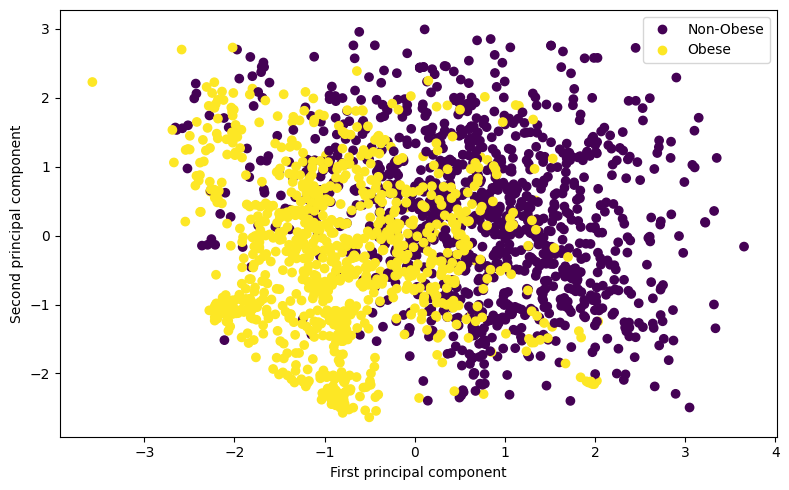

In [25]:
# plot PC1 vs PC2 anc colour code by value of the target
plt.figure(figsize = (8,5))
label=['Non-Obese','Obese']
scatter = plt.scatter(pca_data[:,0],pca_data[:,1],c=target)
plt.legend(label, loc = 'best')
plt.legend(handles = scatter.legend_elements()[0], labels = label)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.tight_layout()

### Part 5.1.4: Feature engineering - II
- In the previous lecture, we have seen how to create principal components from the existing set of features.
- However, for the example, we created just two PCs from 22 attributes, which may not be enough to capture the variation in the data.
- We need to choose the optimum number of PCs that best explains the attributes in the dataset.
- The optimum number of PCs can be chosen with the help of a ***scree plot***.
- The scree plot shows the explained variance per newly defined PC.  That is, x-axis is a list of PCs and y-axis is the varaibility explained by each of these PCs. 
- The measure of the plot can be the percentage or the absolute value of the explained variance (eigenvalues). 
- Usually, the first few principal components explain the a large part of the total variance.
- The optimum number of PCs are selected based on the following criteria:
    1. In the scree plot, observe a point (PC) where the explained variability becomes almost stationary. Select that PC value + 1 as the optimal number of PCs.
    2. We can decide no of PCs based on cumulative variance explained by PCs. For example, if we are targeting 90% information capture via PCs then we can see how many PCs contribute to 90% of variation in total data. We will select that PC value + 1 as optimal number of PCs.

**Let us draw the scree plot:**
- Fit the PCA for the obesity data.
- The total number of PCs initially are 22 (number of attributes).
- Use `np.arange()` method to get a list of values as 0 to 21 (indicating total 22).
- Adding 1 to it will give us a list containing 1 to 22 PCs, that can be used on x-axis.
- The y-axis will be the variance explained by each of these 22 PCs.

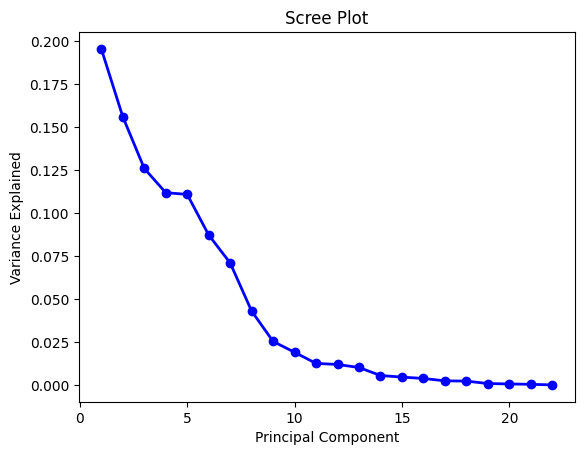

In [26]:
# scree plot of variance explained by PCs
pca = PCA()
pca.fit(obesity_data)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth = 2, color = 'blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

***Inference:***
- We can see that from around PC 10 or 11, there is not much change in the variance. That is, the variance is becoming stationary from 11th PC onwards. 
- So, we can choose the number of principal components as 11 for this data set.
- Alternatively we could use cumulative variance explained to choose the number of PCs.

In [27]:
# fit PCA
pca = PCA()
pca.fit(obesity_data)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [28]:
cumulative_variance

array([0.19536362, 0.3512926 , 0.47717183, 0.5889684 , 0.69973136,
       0.78692036, 0.85787191, 0.90082408, 0.92614087, 0.94512476,
       0.9576629 , 0.96957463, 0.97973386, 0.98522525, 0.9897925 ,
       0.99356669, 0.99596456, 0.99821108, 0.99903038, 0.99960871,
       0.99998202, 1.        ])

In [29]:
# let us target for 90% of the variability
# np.argmax() returns the index of the maximum value
target_variation = 0.90
n_components = np.argmax(cumulative_variance >= target_variation) + 1
n_components

8

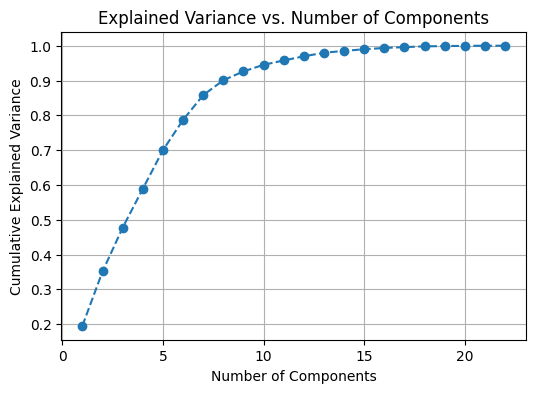

In [30]:
# Plot explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')

plt.grid()
plt.show()

***Inferences***
- Eight principal components are sufficient to explain 90% of the variation in the data.
- So we can build PCA with `n_components = 8` and significantly reduce the number of features to eight from the original 22.

**Setting up the dataframe with newly derived principal components and keep the data ready for model building**
- After deciding on the number of components that are sufficient for model building, we must create a new dataframe with these PCs.
- So, fit PCA with `n_components = 8`.


In [31]:
# PCA with 8 components
n = 8
pca = PCA(n_components = n)
pca_data = pca.fit_transform(obesity_data)
pca_data

array([[ 0.86049914,  0.69130993, -0.63245771, ..., -0.64038052,
         0.68083181,  1.07357215],
       [ 0.51483735, -2.31828079,  1.61788543, ..., -0.41818991,
        -0.08352404, -0.46565972],
       [ 1.45952494, -0.27046629,  0.82038303, ...,  0.50383334,
        -0.21168022,  0.06534582],
       ...,
       [-1.11505473, -1.46991056, -0.74481687, ...,  0.34977021,
        -0.84780038, -0.0890913 ],
       [-1.50565687, -2.01434136, -0.58281305, ..., -0.1576454 ,
        -0.19155962, -0.01954633],
       [-1.41126411, -2.027575  , -0.80488343, ..., -0.15737941,
        -0.11862428, -0.01438647]])

In [32]:
# create equations for the principal components
feature_names= obesity_data.columns.tolist()
loadings=pca.components_
equations = []
for i, pc in enumerate(loadings):
    equation = f'PC{i + 1} = '
    for j, feature in enumerate(feature_names):
        coefficient = pc[j]
        equation += f'{coefficient:.2f} * {feature}'
        if j < len(feature_names) - 1:
            equation += ' + '
    equations.append(equation)

# Print the equations for each principal component
for i, equation in enumerate(equations):
    print(f'Equation for PC{i + 1}:\n {equation} \n')


Equation for PC1:
 PC1 = -0.52 * Age + -0.31 * FCVC + 0.05 * NCP + -0.05 * CH2O + 0.32 * FAF + 0.41 * TUE + -0.56 * BMI + 0.05 * Gender_Male + -0.11 * family_history_with_overweight_yes + -0.04 * FAVC_yes + 0.07 * CAEC_Frequently + -0.09 * CAEC_Sometimes + 0.01 * CAEC_no + -0.00 * SMOKE_yes + 0.02 * SCC_yes + 0.01 * CALC_Frequently + -0.09 * CALC_Sometimes + 0.08 * CALC_no + 0.00 * MTRANS_Bike + -0.00 * MTRANS_Motorbike + 0.07 * MTRANS_Public_Transportation + 0.02 * MTRANS_Walking 

Equation for PC2:
 PC2 = 0.23 * Age + -0.39 * FCVC + -0.41 * NCP + -0.57 * CH2O + -0.42 * FAF + -0.14 * TUE + -0.29 * BMI + -0.02 * Gender_Male + -0.07 * family_history_with_overweight_yes + -0.01 * FAVC_yes + 0.04 * CAEC_Frequently + -0.04 * CAEC_Sometimes + 0.00 * CAEC_no + 0.00 * SMOKE_yes + -0.00 * SCC_yes + 0.00 * CALC_Frequently + -0.06 * CALC_Sometimes + 0.06 * CALC_no + -0.00 * MTRANS_Bike + 0.00 * MTRANS_Motorbike + -0.07 * MTRANS_Public_Transportation + -0.00 * MTRANS_Walking 

Equation for PC3:
 

In [33]:
# create a new data frame with the PCs
PCA_data = pd.DataFrame(pca_data,columns = [f'PC_{i}' for i in range(1,n + 1)])
PCA_data.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
0,0.860499,0.691310,-0.632458,-0.236400,0.737560,-0.640381,0.680832,1.073572
1,0.514837,-2.318281,1.617885,0.472777,-1.642696,-0.418190,-0.083524,-0.465660
2,1.459525,-0.270466,0.820383,0.014879,0.408023,0.503833,-0.211680,0.065346
3,-0.279936,-0.601969,1.554452,-0.481616,-1.290913,0.344100,0.245244,0.009883
4,-0.302393,1.816513,-0.409320,1.611679,-0.609380,-1.223249,-0.531392,-0.382646


In [34]:
# shape of the new data set
PCA_data.shape

(2111, 8)

In [35]:
# join the target variable which we had dropped initially
Final_data = PCA_data.join(target)
Final_data.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,Obesity
0,0.860499,0.691310,-0.632458,-0.236400,0.737560,-0.640381,0.680832,1.073572,0
1,0.514837,-2.318281,1.617885,0.472777,-1.642696,-0.418190,-0.083524,-0.465660,0
2,1.459525,-0.270466,0.820383,0.014879,0.408023,0.503833,-0.211680,0.065346,0
3,-0.279936,-0.601969,1.554452,-0.481616,-1.290913,0.344100,0.245244,0.009883,0
4,-0.302393,1.816513,-0.409320,1.611679,-0.609380,-1.223249,-0.531392,-0.382646,0


In [36]:
# shape of the final data set
Final_data.shape

(2111, 9)

***Conclusions:***
- We have reduced the dimensions of the dataset from 22 to 8.
- We have added the target variable (Obesity) to this dataframe.
- It is now ready for use in model building.